In [2]:
import pandas as pd

In [14]:
import sys
sys.path.append('..')

In [15]:
file_path = "../data/raw/raw_analyst_ratings.csv"
from scripts.file_loader import load_file

In [18]:
news_data = load_file(file_path)
news_data.head()

File successfully loaded: ../data/raw/raw_analyst_ratings.csv


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


#### Shape or Size of news data

In [19]:
news_data.shape

(1407328, 6)

#### Checking news data for missing values

In [21]:
news_data.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

#### date to datetime for analysis

In [27]:
# Convert date to datetime for analysis
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce')
news_data.head(3)

,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29


#### Basic Statistics for Headline Lengths


In [34]:
news_data['headline_length'] = news_data['headline'].apply(len)
length_stats = news_data['headline_length'].describe()

print("Basic Statistics for Headline Lengths:")
print(length_stats)

Basic Statistics for Headline Lengths:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


#### Count the Number of Articles per Publisher

In [31]:
publisher_counts = news_data['publisher'].value_counts()
print("\nNumber of Articles per Publisher:")
print(publisher_counts)


Number of Articles per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Matthew Ely               1
Frank Ochoa               1
Jeremie Capron            1
Marvin Dumont             1
Igor Gonta                1
Name: count, Length: 1034, dtype: int64


#### Analyze Publication Dates

In [32]:
news_data['day_of_week'] = news_data['date'].dt.day_name()
publication_trends = news_data['day_of_week'].value_counts()
print("\nPublication Trends (Articles by Day of the Week):")
print(publication_trends)


Publication Trends (Articles by Day of the Week):
day_of_week
Thursday     12688
Wednesday    11891
Tuesday      11002
Monday       10322
Friday        9381
Sunday         436
Saturday       267
Name: count, dtype: int64


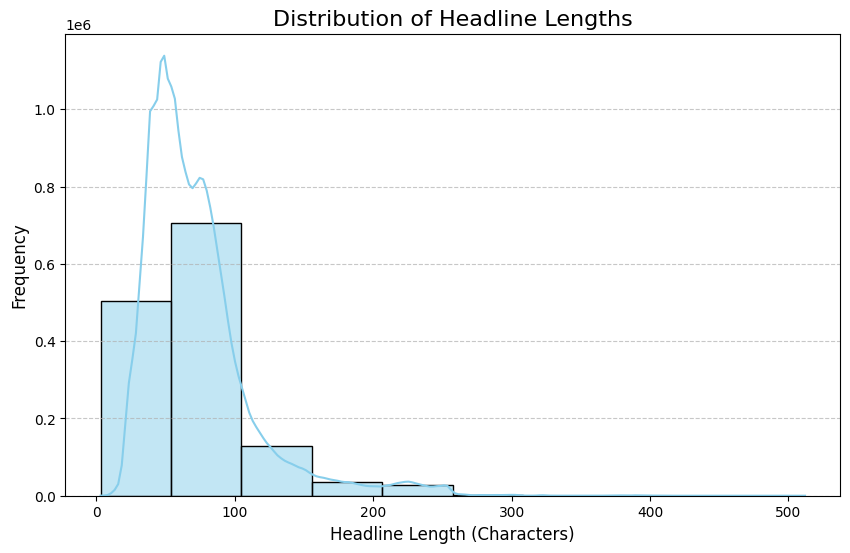

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualizing Headline Lengths
plt.figure(figsize=(10, 6))
sns.histplot(news_data['headline_length'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Headline Lengths', fontsize=16)
plt.xlabel('Headline Length (Characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


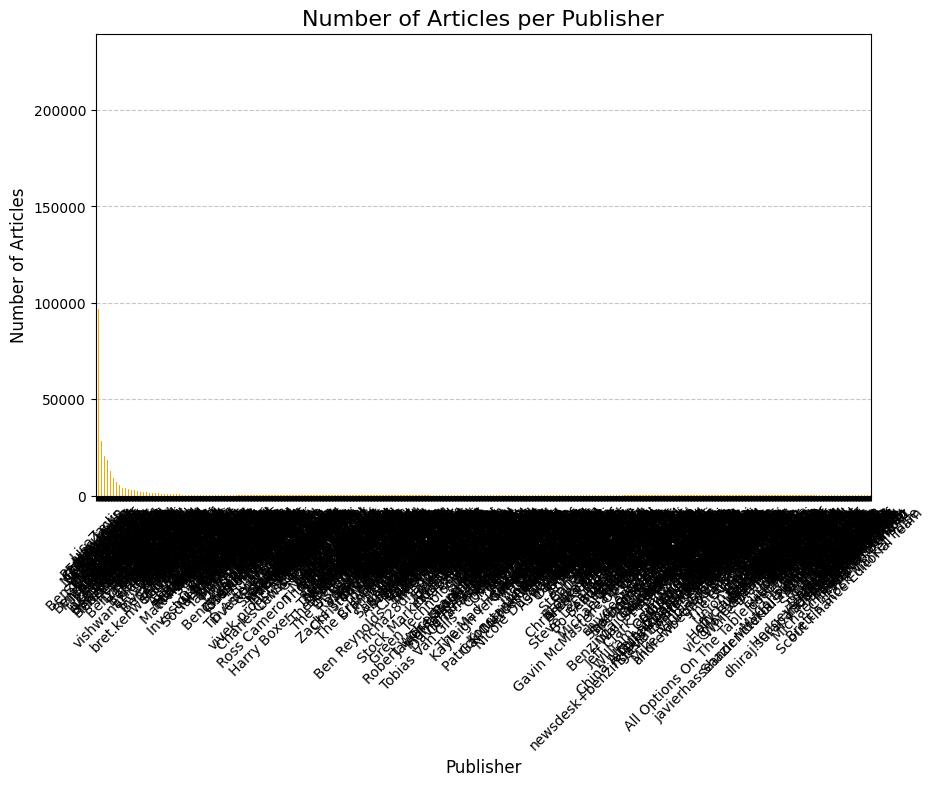

In [36]:
# 2. Visualizing Article Counts per Publisher
plt.figure(figsize=(10, 6))
publisher_counts.plot(kind='bar', color='orange')
plt.title('Number of Articles per Publisher', fontsize=16)
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Coop\AppData\Local\Temp\ipykernel_7780\2313654122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publication_trends.index, y=publication_trends.values, palette='viridis')


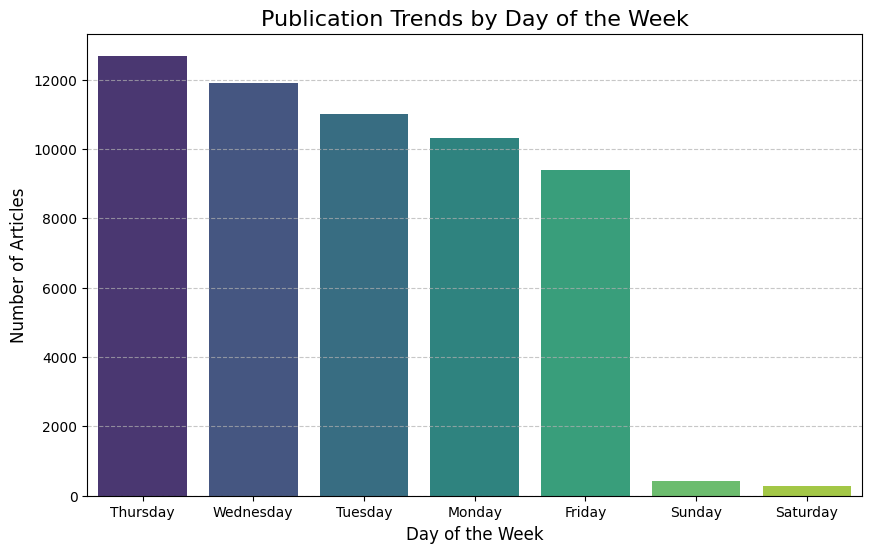

In [37]:
# 3. Visualizing Publication Trends by Day of the Week
plt.figure(figsize=(10, 6))
sns.barplot(x=publication_trends.index, y=publication_trends.values, palette='viridis')
plt.title('Publication Trends by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
df1 = pd.read_csv("../data/raw/yfinance_data/AAPL_historical_data.csv")
df1

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0
10995,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0
